Chapter 2 Machine learning 1st project based on Housing price perdiction 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 
import seaborn as sns
import gc
from sklearn.dummy import DummyClassifier 
from sklearn.model_selection import train_test_split

In [3]:
#Reading the Dataset
df = pd.read_csv("housing.csv")
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
#Describing the data like what kind of dTypes are they 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#use to describe the data more clearly and helps to find cout of values in each categories 
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
#Describe method shows a summary of the give data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


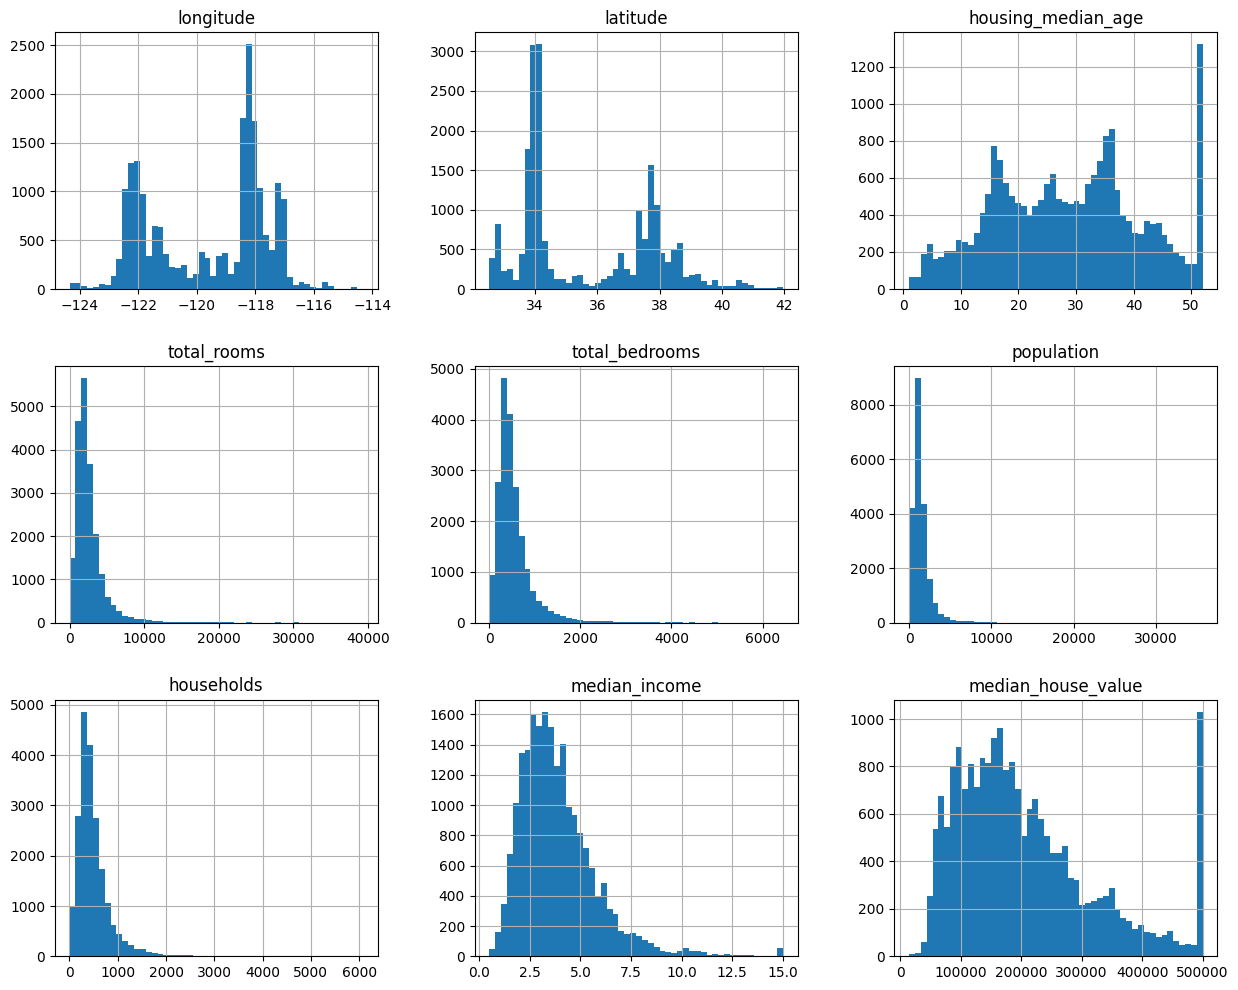

In [7]:
df.hist(bins=50, figsize=(15,12))
plt.show()

In [8]:
#Separating the data's randomly for test, train values
def shuffle_and_split_data(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

train_set,test_set= shuffle_and_split_data(df, 0.2)
print(len(train_set))
print(len(test_set))

    

16512
4128


In [9]:

print(len(df))
print(len(df) * 0.2)

20640
4128.0


In [10]:
#importing crc32 from zlib
from zlib import crc32

In [11]:
#This function is used to check weather all ids are persent or not 
def is_id_in_test_set(ids ,test_ratio):
    return crc32(np.int64(ids))< test_ratio * 2**32

In [12]:
#we are using this function tp split the data in Id hashes 
def split_data_with_id_hash(df,test_ratio , id_col):
    ids = df[id_col]
    #we are applying is_id_in_test_set function to each ids
    in_test_set = ids.apply( lambda id_ : is_id_in_test_set(ids, test_ratio))
    #spliting the data into train set and test set
    return df.loc[~in_test_set], df.loc[in_test_set]

In [13]:
#adding the index to df
df_with_id = df.reset_index()

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
# here we are provinding the data with index 
train_set, test_set = split_data_with_id_hash(df_with_id, 0.2 , "index")

In [16]:
#here we have created our own id to relay on 
df_with_id["id"] = df["longitude"] * 1000 + df["latitude"]
train_set, test_set = split_data_with_id_hash(df_with_id, 0.2 , "id")

In [17]:
# performing the machine learning model train_test_split
train_set, test_set = train_test_split(df,test_size=0.2, random_state=42)

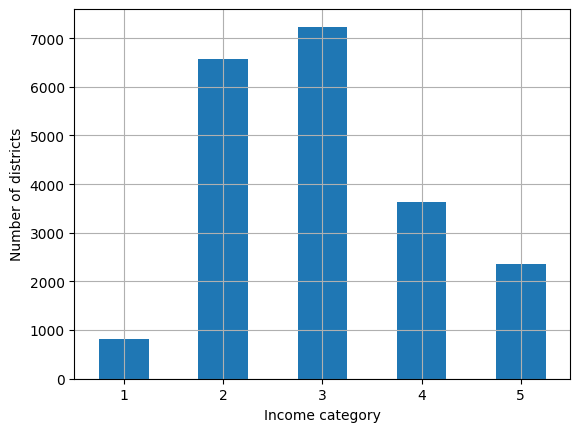

In [18]:
df["income_cat"] = pd.cut(df["median_income"], bins = [0.,1.5,3.0,4.5,6.,np.inf], labels= [1,2,3,4,5])
df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [19]:
#Importing StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
# we using to split the data equally with minimum error  across the each category 
splitter = StratifiedShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state = 42)
strat_splits = []
for train_index, test_index in splitter.split(df, df["income_cat"]):
    train_set_n = df.iloc[train_index]
    test_set_n = df.iloc[test_index]
    strat_splits.append([train_set_n,test_set_n])

In [21]:
strat_train_set,strat_test_set = strat_splits[0]

In [22]:
strat_train_set,strat_test_set = train_test_split(df, test_size=0.2, stratify = df["income_cat"],random_state= 42)

In [23]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [24]:
for i in (strat_train_set,strat_test_set): i.drop("income_cat",axis=1,inplace=True)

In [25]:
df=strat_train_set.copy()

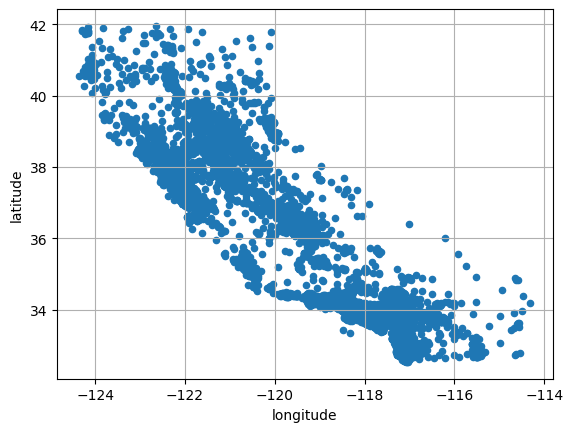

In [26]:
df.plot(kind= "scatter", x="longitude", y="latitude",grid= True)
plt.show()

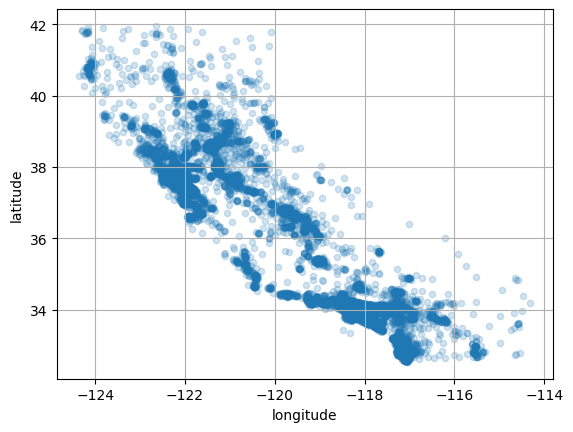

In [27]:
df.plot(kind= "scatter", x="longitude", y="latitude",alpha=0.2,grid= True)
plt.show()

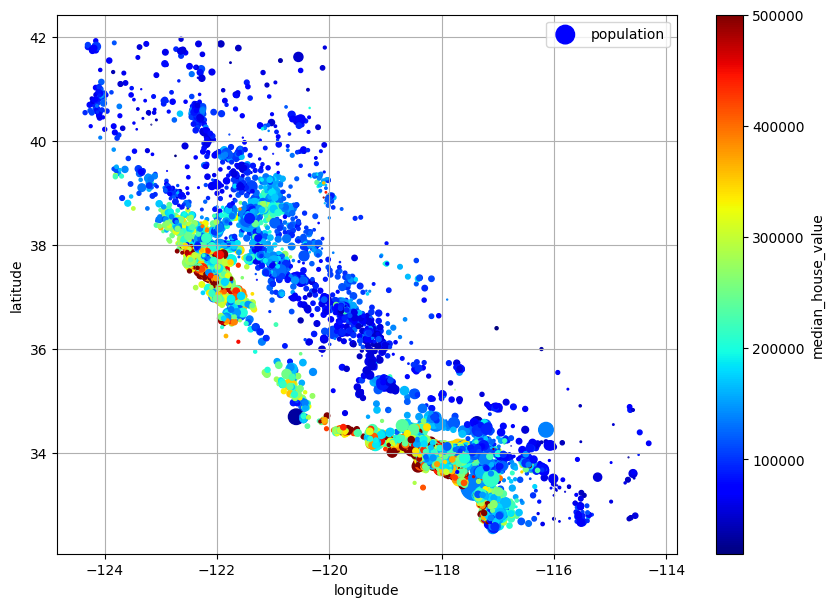

In [28]:
df.plot(kind="scatter", x="longitude", y="latitude" ,grid= True , s= df["population"]/100, label = "population", c= "median_house_value", cmap="jet", colorbar= True, legend = True , sharex = False, figsize=(10,7))
plt.show()

In [34]:
co_relation = df.select_dtypes(include='number').corr()

In [39]:
co_relation["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

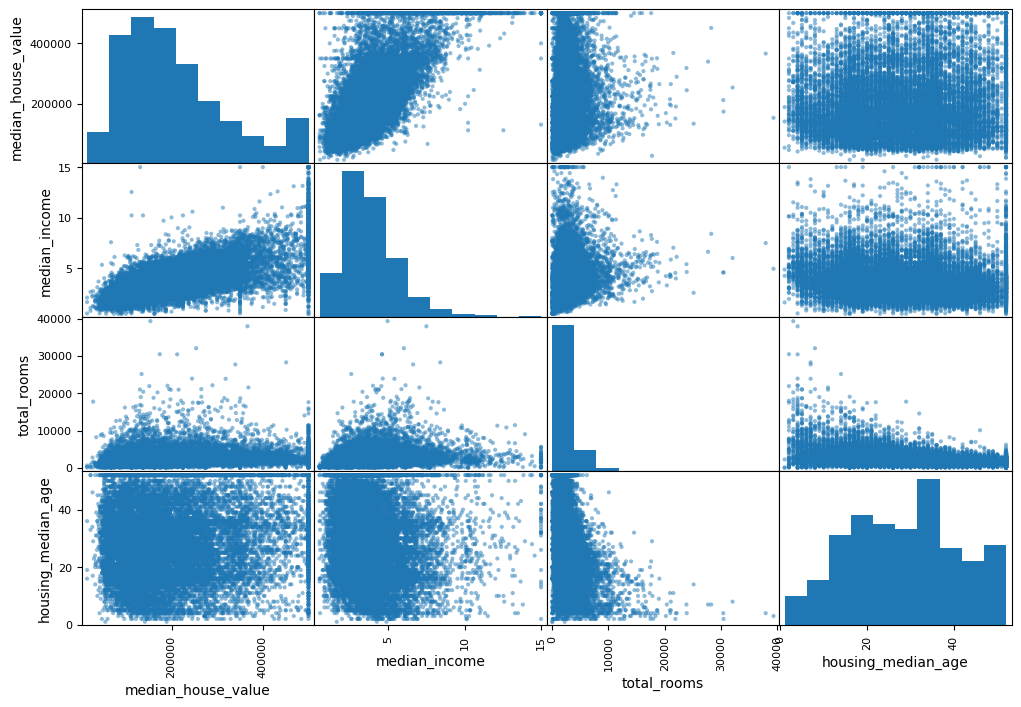

In [46]:
attributes = ["median_house_value", "median_income","total_rooms","housing_median_age"]
from pandas.plotting import scatter_matrix
plt.figsize=(15,12)
scatter_matrix(df[attributes], figsize=(12,8))
plt.show()

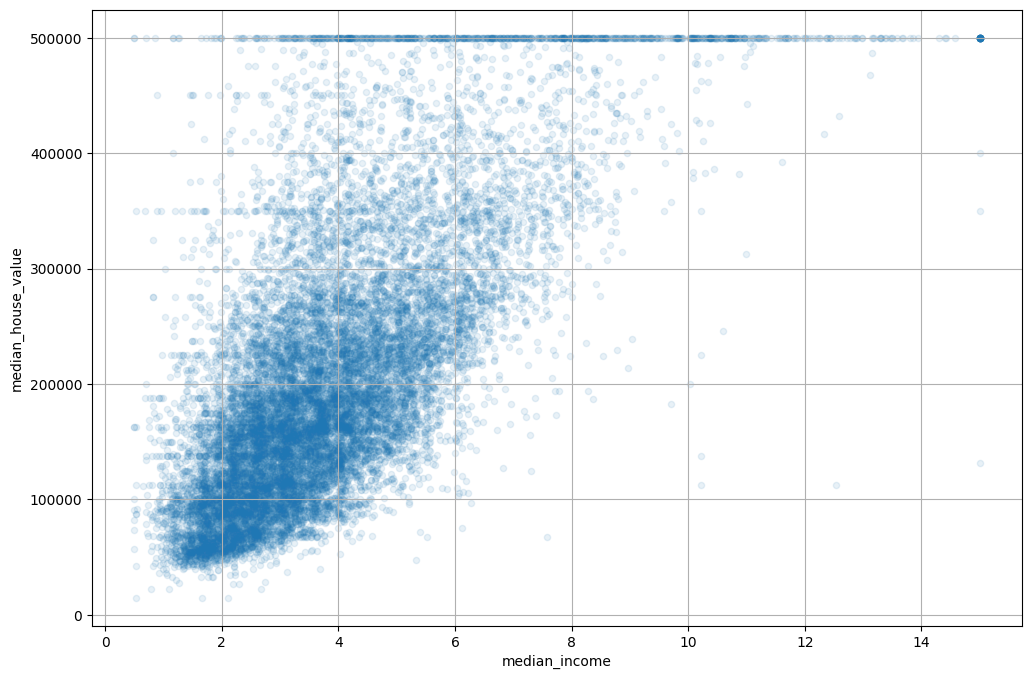

In [53]:
df.plot(kind="scatter" , x="median_income", y="median_house_value", alpha = 0.1 , grid = True, figsize=(12,8))
plt.show()

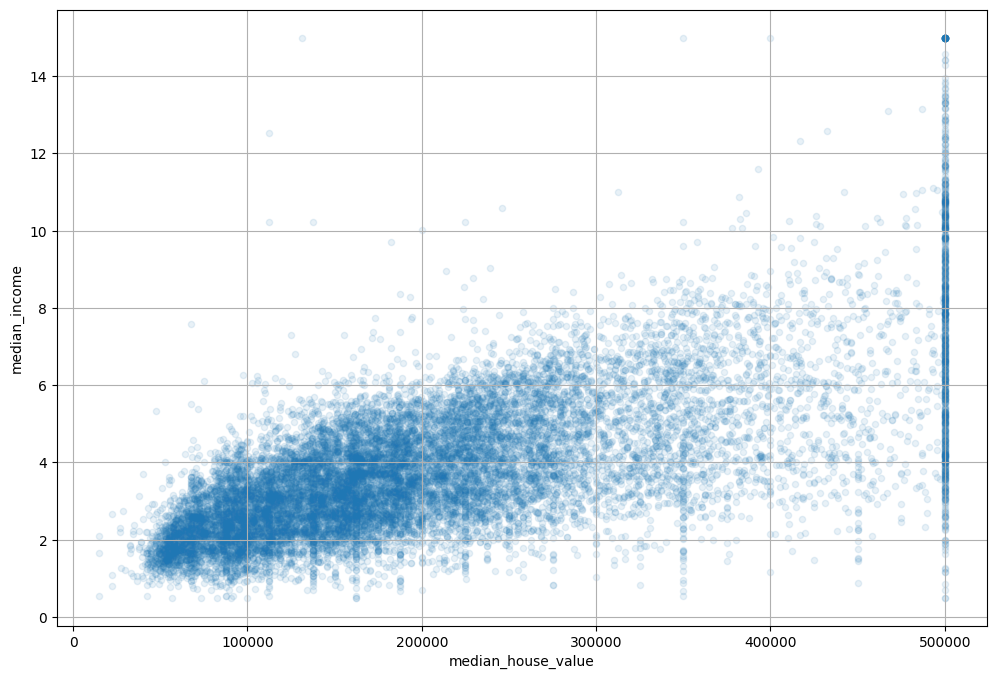

In [54]:
df.plot(kind="scatter" , y="median_income", x="median_house_value", alpha = 0.1 , grid = True, figsize=(12,8))
plt.show()